[View in Colaboratory](https://colab.research.google.com/github/joaoflf/ml-playground/blob/master/kaggle_titanic.ipynb)

## Titanic Kaggle Competition

My attempt of this competition using deep neural networks.

---
Start by importing and setting up Tensorboard

In [121]:
import os
if not os.path.exists('./colab_utils'):
  !git clone https://github.com/mixuala/colab_utils.git
    
import colab_utils.tboard
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
ROOT = %pwd
root_log_dir = os.path.join(ROOT, 'tf_logs')
colab_utils.tboard.launch_tensorboard( bin_dir=ROOT, log_dir=root_log_dir )

ngrok installed
status: tensorboard=True, ngrok=True
tensorboard url= https://7519ec10.ngrok.io


'https://7519ec10.ngrok.io'

Download and extract train and test csv files and load them into Pandas data frame



In [122]:
!rm -rf data
if not os.path.exists('./data'):
  !mkdir data
  !wget -O ./data/train.csv https://www.dropbox.com/s/47sadlv7emve5i4/train.csv?raw=1
  !wget -O ./data/test.csv https://www.dropbox.com/s/p4l8elh79agtyvw/test.csv?raw=1



--2018-06-13 16:50:46--  https://www.dropbox.com/s/47sadlv7emve5i4/train.csv?raw=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:6022:1::a27d:4201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc91865dd074b60d7c675b9cae49.dl.dropboxusercontent.com/cd/0/inline/AIxi72Yo1lV8OogZktoxaG-dPtN7p88iob8z-79rZFmQoT-brMGEQckNXikZxSWz_e7hcpU1QiCbDwHqXh7n4oHaK6EMH8KLXkDGoeSvO83oIqWDsDxKpK3CWV7jwkEM0Uhk_8166BiiZ4xPx5bYgh8AthTbYO6P6q5Fi37z2ivhZatftPFYPMKACIPxEJT9Y8o/file [following]
--2018-06-13 16:50:47--  https://uc91865dd074b60d7c675b9cae49.dl.dropboxusercontent.com/cd/0/inline/AIxi72Yo1lV8OogZktoxaG-dPtN7p88iob8z-79rZFmQoT-brMGEQckNXikZxSWz_e7hcpU1QiCbDwHqXh7n4oHaK6EMH8KLXkDGoeSvO83oIqWDsDxKpK3CWV7jwkEM0Uhk_8166BiiZ4xPx5bYgh8AthTbYO6P6q5Fi37z2ivhZatftPFYPMKACIPxEJT9Y8o/file
Resolving uc91865dd074b60d7c675b9cae49.dl.dropboxusercontent.com (uc91865dd074b60d7c675b9cae49.dl.drop

Load and inspect dataset

In [123]:
train_set = pd.read_csv('./data/train.csv')
test_set = pd.read_csv('./data/test.csv')
train_set.reindex(np.random.permutation(train_set.index))
cv_set = train_set[700:]
#train_set= train_set[:700]
cv_set.values.shape

(191, 12)

Explore relationship between class and survival

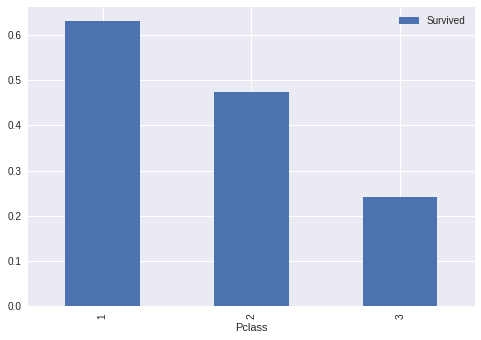

In [124]:
class_pivot = train_set.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

Explore relationship between sex and survival

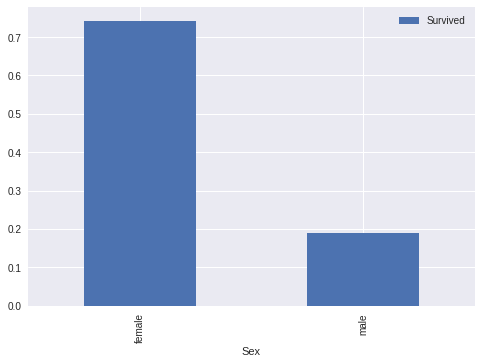

In [125]:
class_pivot = train_set.pivot_table(index="Sex",values="Survived")
class_pivot.plot.bar()
plt.show()

Explore relationship between port embarked and survival

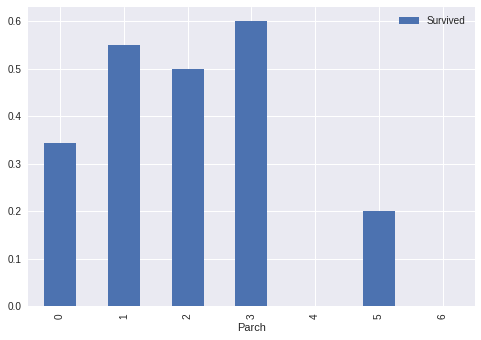

In [126]:
class_pivot = train_set.pivot_table(index="Parch",values="Survived")
class_pivot.plot.bar()
plt.show()

Group ages into brackets and see their relationship with survival

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


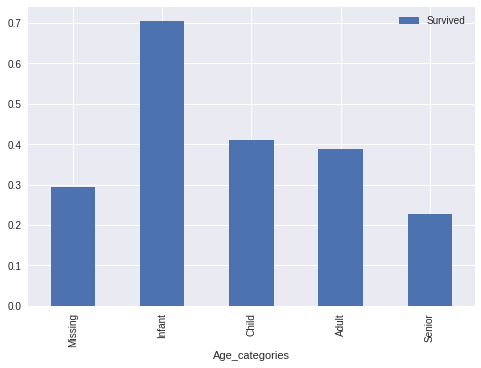

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


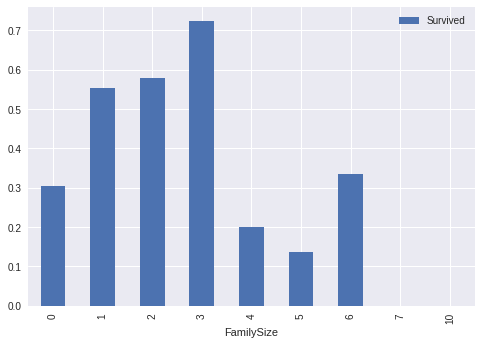

In [127]:
def group_feature_values(df,feature,cut_points,label_names):
    df[feature] = df[feature].fillna(-0.5)
    df[feature+'_categories'] = pd.cut(df[feature],cut_points,labels=label_names)
    return df


cut_points = [-1,0,5,18,60,100]
label_names = ["Missing","Infant","Child","Adult","Senior"]

train = group_feature_values(train_set,'Age' ,cut_points,label_names)
cv = group_feature_values(cv_set, 'Age',cut_points,label_names)
test = group_feature_values(test_set, 'Age',cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

train['SibSp'].fillna(0)
train['Parch'].fillna(0)
train['FamilySize'] = train['SibSp'] + train['Parch']
cv['SibSp'].fillna(0)
cv['Parch'].fillna(0)
cv['FamilySize'] = cv['SibSp'] + cv['Parch']
test['SibSp'].fillna(0)
test['Parch'].fillna(0)
test['FamilySize'] = test['SibSp'] + test['Parch']


pivot = train.pivot_table(index="FamilySize",values='Survived')
pivot.plot.bar()
plt.show()


One-hot encode relevant features

In [128]:
for each in ['Age_categories', 'Sex', 'Pclass', 'Embarked'] :
  dummies = pd.get_dummies(train[each], prefix=each, drop_first=False)
  train = pd.concat([train, dummies], axis=1)
  dummies = pd.get_dummies(cv[each], prefix=each, drop_first=False)
  cv = pd.concat([cv, dummies], axis=1)
  dummies = pd.get_dummies(test[each], prefix=each, drop_first=False)
  test = pd.concat([test, dummies], axis=1)

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_categories_Adult,Age_categories_Senior,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,...,1,0,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,...,1,0,1,0,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.45,...,0,0,1,0,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,...,1,0,0,1,1,0,0,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,...,1,0,0,1,0,0,1,0,1,0


Build neural network model

In [0]:
tf.reset_default_graph()

learning_rate = 0.0001
momentum = 0.95

X = tf.placeholder(tf.float32, shape= [None, 11])
y = tf.placeholder(tf.int32, shape= [None, 1])

he_init = tf.contrib.layers.variance_scaling_initializer()
regularizer = tf.contrib.layers.l2_regularizer(scale=0.1)
training = tf.placeholder_with_default(False, shape=(), name='training')
dropout_rate = 0.3

dense_1 = tf.layers.dropout(tf.contrib.layers.batch_norm(tf.layers.dense(X, 100, activation=tf.nn.relu, kernel_initializer=he_init, kernel_regularizer=regularizer, name='dense_1')),dropout_rate, training=training)
dense_2 = tf.layers.dropout(tf.contrib.layers.batch_norm(tf.layers.dense(dense_1, 100, activation=tf.nn.relu, kernel_initializer=he_init,  kernel_regularizer=regularizer, name='dense_2')),dropout_rate, training=training)
dense_3 = tf.layers.dropout(tf.contrib.layers.batch_norm(tf.layers.dense(dense_2, 50, activation=tf.nn.relu, kernel_initializer=he_init,  kernel_regularizer=regularizer, name='dense_3')),dropout_rate, training=training)
dense_4 = tf.layers.dropout(tf.contrib.layers.batch_norm(tf.layers.dense(dense_3, 10, activation=tf.nn.relu, kernel_initializer=he_init,  kernel_regularizer=regularizer, name='dense_4')),dropout_rate, training=training)


logits = tf.layers.dense(dense_2, 1, name='logits', kernel_initializer=he_init)

y_prob = tf.nn.sigmoid(logits)
y_pred = tf.cast(tf.greater_equal(logits, 0), tf.int32)

with tf.name_scope('loss'):
  y_as_float = tf.cast(y, tf.float32)
  xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_as_float, logits=logits)
  loss = tf.reduce_mean(xentropy, name='loss')

with tf.name_scope('train'):
  optimizer = tf.train.AdamOptimizer(learning_rate)
  training_op = optimizer.minimize(loss)

with tf.name_scope('eval'):
  y_pred_correct = tf.equal(y_pred, y)
  accuracy = tf.reduce_mean(tf.cast(y_pred_correct, tf.float32), name='accuracy')


loss_summary = tf.summary.scalar('Loss', loss)
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Train Model

In [136]:
import time
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
logdir = "{}/run-{}/".format(root_log_dir, now)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10000
batch_step = 0
important_features = ['Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child', 'Age_categories_Adult',	'Age_categories_Senior', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySize']
start_time = time.time()

with tf.Session() as sess:
  init.run()
  
  for epoch in range(n_epochs):
    X_batch, y_batch = train[important_features].values, train['Survived'].values.reshape([891,1])
    sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    summary_str, acc_train, loss_str = sess.run([loss_summary, accuracy, loss], feed_dict={X: X_batch, y: y_batch, training:True})
    file_writer.add_summary(summary_str,batch_step)
    
    batch_step+=1
    if epoch % 1000 == 0:
      print(epoch, "Train accuracy:", acc_train, 'Loss:', loss_str)

      
  X_batch, y_batch = cv[important_features].values, cv['Survived'].values.reshape([191,1])
  
  acc_test = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
  print("CV accuracy:", acc_test)
  
  X_batch = test[important_features].values
  prediction = sess.run([y_pred], feed_dict={X: X_batch, training:False})
 
  
  file_writer.close()
  sess.close()
  print("--- %s seconds ---" % (time.time() - start_time))

0 Train accuracy: 0.4130191 Loss: 1.2059299
1000 Train accuracy: 0.681257 Loss: 0.7034301
2000 Train accuracy: 0.67227834 Loss: 0.73459226
3000 Train accuracy: 0.6958474 Loss: 0.75251883
4000 Train accuracy: 0.671156 Loss: 0.74516916
5000 Train accuracy: 0.69809204 Loss: 0.7701614
6000 Train accuracy: 0.6632997 Loss: 0.96140116
7000 Train accuracy: 0.6666667 Loss: 0.9184272
8000 Train accuracy: 0.67901236 Loss: 0.88712627
9000 Train accuracy: 0.64646465 Loss: 0.9928084
CV accuracy: 0.87434554
--- 76.62873101234436 seconds ---


In [0]:
from google.colab import files

predictiona = np.transpose(np.array(prediction))
predictionpd = pd.DataFrame(predictiona[0], columns=['Survived'])
submission = pd.concat([test_set['PassengerId'], predictionpd], axis=1).to_csv('pred.csv', index=False)
files.download('pred.csv')